In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [40]:
df = pd.read_csv("Churn_Modelling.csv")

In [41]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [42]:
df.shape

(10000, 14)

In [43]:
df.info

<bound method DataFrame.info of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfP

In [44]:
df.duplicated().sum()

0

In [45]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [46]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [47]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'] , inplace=True)

In [48]:
df.info

<bound method DataFrame.info of       CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember

In [49]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [50]:

X = df.drop(columns=['Exited'])
y = df['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [51]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [52]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [53]:
X_train.shape

(8000, 11)

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
X_test_scaled

array([[-1.03768121,  0.77498705, -1.0482813 , ..., -0.58312392,
        -0.57273139,  0.91509065],
       [ 0.30708683, -0.46686456, -0.70174202, ..., -0.58312392,
        -0.57273139,  0.91509065],
       [-1.23422423,  0.29735181, -1.0482813 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       ...,
       [-0.86182692, -0.46686456,  1.72403288, ..., -0.58312392,
         1.74601919,  0.91509065],
       [-0.30323097, -0.84897275, -1.0482813 , ...,  1.71490137,
        -0.57273139, -1.09278791],
       [ 0.04847759,  1.25262228,  1.3774936 , ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [56]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [72]:
model = Sequential()

model.add(Dense(11, activation='relu', input_dim=11))
model.add(Dense(11, activation='relu'))

model.add(Dense(1, activation='relu'))

c:\Users\irbag\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

In [83]:
history = model.fit(X_train_scaled, y_train, epochs=200, validation_split=0.2)

Epoch 1/200
  1/200 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9375 - loss: 0.1828

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8709 - loss: 0.3227 - val_accuracy: 0.8525 - val_loss: 0.4382
Epoch 2/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8663 - loss: 0.3329 - val_accuracy: 0.8575 - val_loss: 0.4353
Epoch 3/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8697 - loss: 0.3167 - val_accuracy: 0.8537 - val_loss: 0.4461
Epoch 4/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8668 - loss: 0.3182 - val_accuracy: 0.8544 - val_loss: 0.4141
Epoch 5/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8696 - loss: 0.3286 - val_accuracy: 0.8575 - val_loss: 0.4372
Epoch 6/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8600 - loss: 0.3189 - val_accuracy: 0.8487 - val_loss: 0.4122
Epoch 7/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8646 - loss: 0.3084 - val_accuracy: 0.8556 - val_loss: 0.4398
Epoch 8/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8603 - loss: 0.3343 - val_accuracy: 0.8569

In [80]:
model.layers[0].get_weights()

[array([[-0.13533187, -0.29381204,  0.18792996, -0.10165069, -0.16972315,
         -0.04344352,  0.11204449,  0.32012168, -0.18749839,  0.00712808,
         -0.1620544 ],
        [-0.48142272,  0.19666626,  0.53268284, -0.45391563,  0.22655484,
          0.3353239 , -0.23194031, -0.4899043 ,  0.27827585,  0.58478403,
          0.70396334],
        [-0.02603803, -0.06652136, -0.10379044, -0.05741597,  0.32761586,
          0.23572585,  0.07798994, -0.50217277,  0.1612273 ,  0.01046832,
          0.13848439],
        [-0.51747084,  0.69144136,  0.27153724, -0.31594983,  0.6186973 ,
         -0.05425344,  0.42346454, -0.1633837 ,  0.25237688, -0.20381683,
         -0.2953822 ],
        [-0.41986036,  0.52694476,  0.46266407, -0.36121285, -0.17346574,
          1.0109472 , -0.7155103 ,  0.5112    ,  0.7048955 , -0.9815091 ,
         -0.19513674],
        [-0.11892164,  0.05560122, -0.12888218,  0.0294104 ,  0.31676048,
          0.11736325,  0.02921312,  0.00731269,  0.11264706,  0.0222867

In [81]:
y_log = model.predict(X_test_scaled)
y_pred = np.where(y_log > 0.5, 1, 0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [82]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.862

In [84]:
history.history

{'accuracy': [0.866406261920929,
  0.8651562333106995,
  0.8648437261581421,
  0.8646875023841858,
  0.8659374713897705,
  0.8660937547683716,
  0.8656250238418579,
  0.866406261920929,
  0.8650000095367432,
  0.8656250238418579,
  0.8653125166893005,
  0.8653125166893005,
  0.8653125166893005,
  0.8654687404632568,
  0.8670312762260437,
  0.8646875023841858,
  0.8670312762260437,
  0.8639062643051147,
  0.8668749928474426,
  0.8648437261581421,
  0.8665624856948853,
  0.8650000095367432,
  0.8648437261581421,
  0.8600000143051147,
  0.8659374713897705,
  0.8662499785423279,
  0.8667187690734863,
  0.8665624856948853,
  0.8659374713897705,
  0.8642187714576721,
  0.8653125166893005,
  0.8657812476158142,
  0.8645312786102295,
  0.8668749928474426,
  0.8678125143051147,
  0.867968738079071,
  0.8659374713897705,
  0.8665624856948853,
  0.8668749928474426,
  0.8668749928474426,
  0.8667187690734863,
  0.8681250214576721,
  0.8682812452316284,
  0.8668749928474426,
  0.8648437261581421,
 

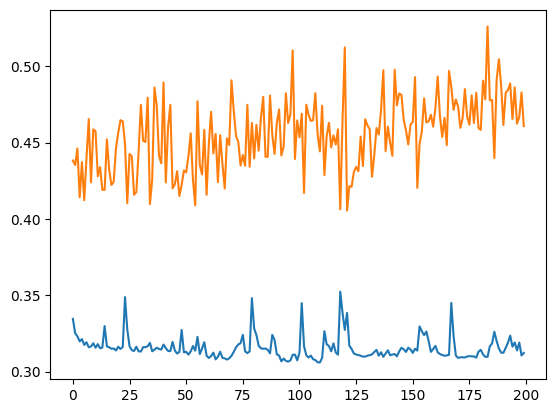

In [87]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

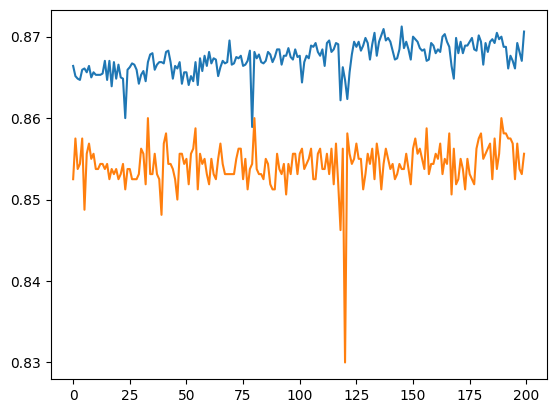

In [89]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])